In [27]:
import os
import cv2
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import random

In [280]:
class Annotation:
    def __init__(self, cat, img_filename, bbox):
        self.cat = cat
        self.img_filename = img_filename
        self.bbox = bbox

In [281]:
annotation_path = "data/roadsigns/annotations/"
categorised = {}

for filename in os.listdir(annotation_path):
    with open(os.path.join(annotation_path, filename), 'r') as f:
        file = f.read()

    bs = BeautifulSoup(file, "xml")
    img_filename = bs.findAll("filename")[0].contents[0]
    detections = bs.findAll("object")
    det_dct = {}

    for det in detections:
        img_type = det.findChildren("name")[0].contents[0]
        if img_type not in det_dct:
            det_dct[img_type] = []

        bbox = det.findChildren("bndbox")[0]
        xmin = int(bbox.findChildren("xmin")[0].contents[0])
        ymin = int(bbox.findChildren("ymin")[0].contents[0])
        xmax = int(bbox.findChildren("xmax")[0].contents[0])
        ymax = int(bbox.findChildren("ymax")[0].contents[0])

        det_dct[img_type].append([xmin, ymin, xmax, ymax])

    if img_type not in categorised:
        categorised[img_type] = []
    for k, v in det_dct.items():
        ann = Annotation(k, img_filename, v)
        categorised[k].append(ann)


In [282]:
for k in categorised.keys():
    print(k, len(categorised[k]))

trafficlight 104
speedlimit 678
crosswalk 170
stop 91


121 road578.png


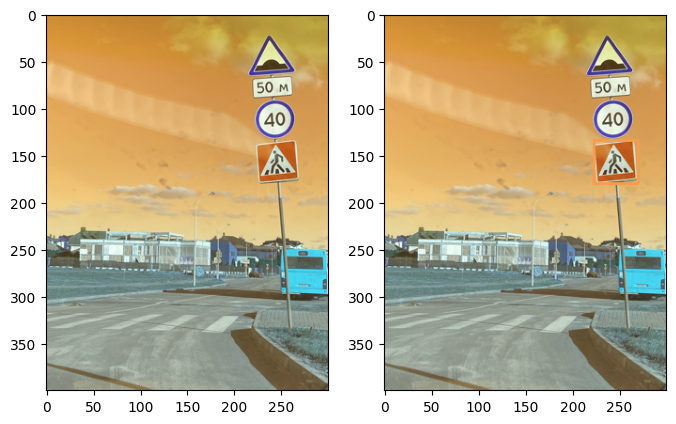

In [290]:
img_path = "data/roadsigns/images/"

ind = random.randint(0, 169)

ann = categorised["crosswalk"][ind]

image = cv2.imread(os.path.join(img_path, ann.img_filename))
bboxes = ann.bbox
for bbox in bboxes:
    xmin, ymin, xmax, ymax = bbox
    color = random.sample(range(256), 3)
    image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=color, thickness=2)

print(ind, ann.img_filename)

plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.imshow(cv2.imread(os.path.join(img_path, ann.img_filename)))
plt.subplot(1,2,2)
plt.imshow(image)


In [293]:
cw_img_names = list(map(lambda x: x.img_filename, categorised["crosswalk"]))
print(len(cw_img_names))
print(cw_img_names)

170
['road122.png', 'road123.png', 'road124.png', 'road125.png', 'road126.png', 'road127.png', 'road128.png', 'road129.png', 'road130.png', 'road131.png', 'road132.png', 'road133.png', 'road134.png', 'road135.png', 'road136.png', 'road137.png', 'road138.png', 'road139.png', 'road140.png', 'road141.png', 'road142.png', 'road143.png', 'road144.png', 'road145.png', 'road146.png', 'road147.png', 'road148.png', 'road149.png', 'road150.png', 'road151.png', 'road152.png', 'road153.png', 'road154.png', 'road155.png', 'road156.png', 'road158.png', 'road160.png', 'road165.png', 'road166.png', 'road167.png', 'road168.png', 'road170.png', 'road171.png', 'road176.png', 'road178.png', 'road179.png', 'road180.png', 'road183.png', 'road186.png', 'road187.png', 'road189.png', 'road190.png', 'road193.png', 'road194.png', 'road200.png', 'road204.png', 'road205.png', 'road207.png', 'road226.png', 'road270.png', 'road272.png', 'road275.png', 'road278.png', 'road281.png', 'road282.png', 'road300.png', 'road

In [304]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cw_img_names, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.25, random_state=42)

print(len(train), len(val), len(test))

102 34 34


In [325]:
def write_lst(path, lst):
    with open(path, "w") as f:
        f.write("[")
        for n in lst:
            f.write(f"'{n}', ")
        f.write("]")

write_lst("data/roadsigns/cw_train_imgs.txt", train)
write_lst("data/roadsigns/cw_val_imgs.txt", val)
write_lst("data/roadsigns/cw_test_imgs.txt", test)